# Задание 3
## Часть 1 - построение графика бассейна корней

Можно предположить, что для уравнения $ z^3 - 1 = 0 $ сходимость к одному из 3 корней ( $ 1; -\frac{1}{2} + i\frac{\sqrt{3}}{2}; -\frac{1}{2} - i\frac{\sqrt{3}}{2} $ ) будет определяться расстоянием - сойдется к тому корню, который ближе к начальному приближению. Но если попытаться построить график, то картина будет такая:


In [1]:
from cmath import sqrt
import numpy as np
import matplotlib.pyplot as plt 
CONVERGENCE_EPS = 1e-7
DIF_EPS = 1e-1
PLOT_STEP =  5 * 1e-4
STOP_IND = 20
def newton_method(start: complex, need_iteration_sequence = False):
    iteration_sequence = [start]
    change = 1
    prev: complex
    next = start
    ind = 1
    while change >= CONVERGENCE_EPS and ind < STOP_IND:
        prev = next
        next = prev - ((prev ** 3 - (1 + 0j)) / (3 * prev ** 2))
        change = abs(next - prev)
        if need_iteration_sequence:
            iteration_sequence.append(next)
        ind += 1
    return next, np.array(iteration_sequence)

In [2]:
firs_root = 1 + 0j
second_root = complex(-0.5, (sqrt(3)/2))
third_root = complex(-0.5, -(sqrt(3)/2))

def calc_root_pools():
    pools = [[] for _ in range(4)]     
    line = np.arange(-2, 2, step = PLOT_STEP)
    for real in line:
        for image in line:
            root, _ = newton_method(complex(real, image))
            distances_to_roots = [abs(root - firs_root), abs(root - second_root), abs(root - third_root)]
            ind_root = np.argmin(distances_to_roots)
            #consider point didn't convergence to correct root if distance to each of it more then DIF_EPS (0.1 in current modification)
            if min(distances_to_roots) < DIF_EPS:
                pools[ind_root].append((real, image))
            else:
                pools[3].append((real, image))

    return np.array(pools[0], dtype=tuple),\
           np.array(pools[1], dtype=tuple),\
           np.array(pools[2], dtype=tuple),\
           np.array(pools[3], dtype=tuple)       

first_root_pool, second_root_pool,third_root_pool, uncorrected_root_pool = calc_root_pools()

c:\users\sergalb\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


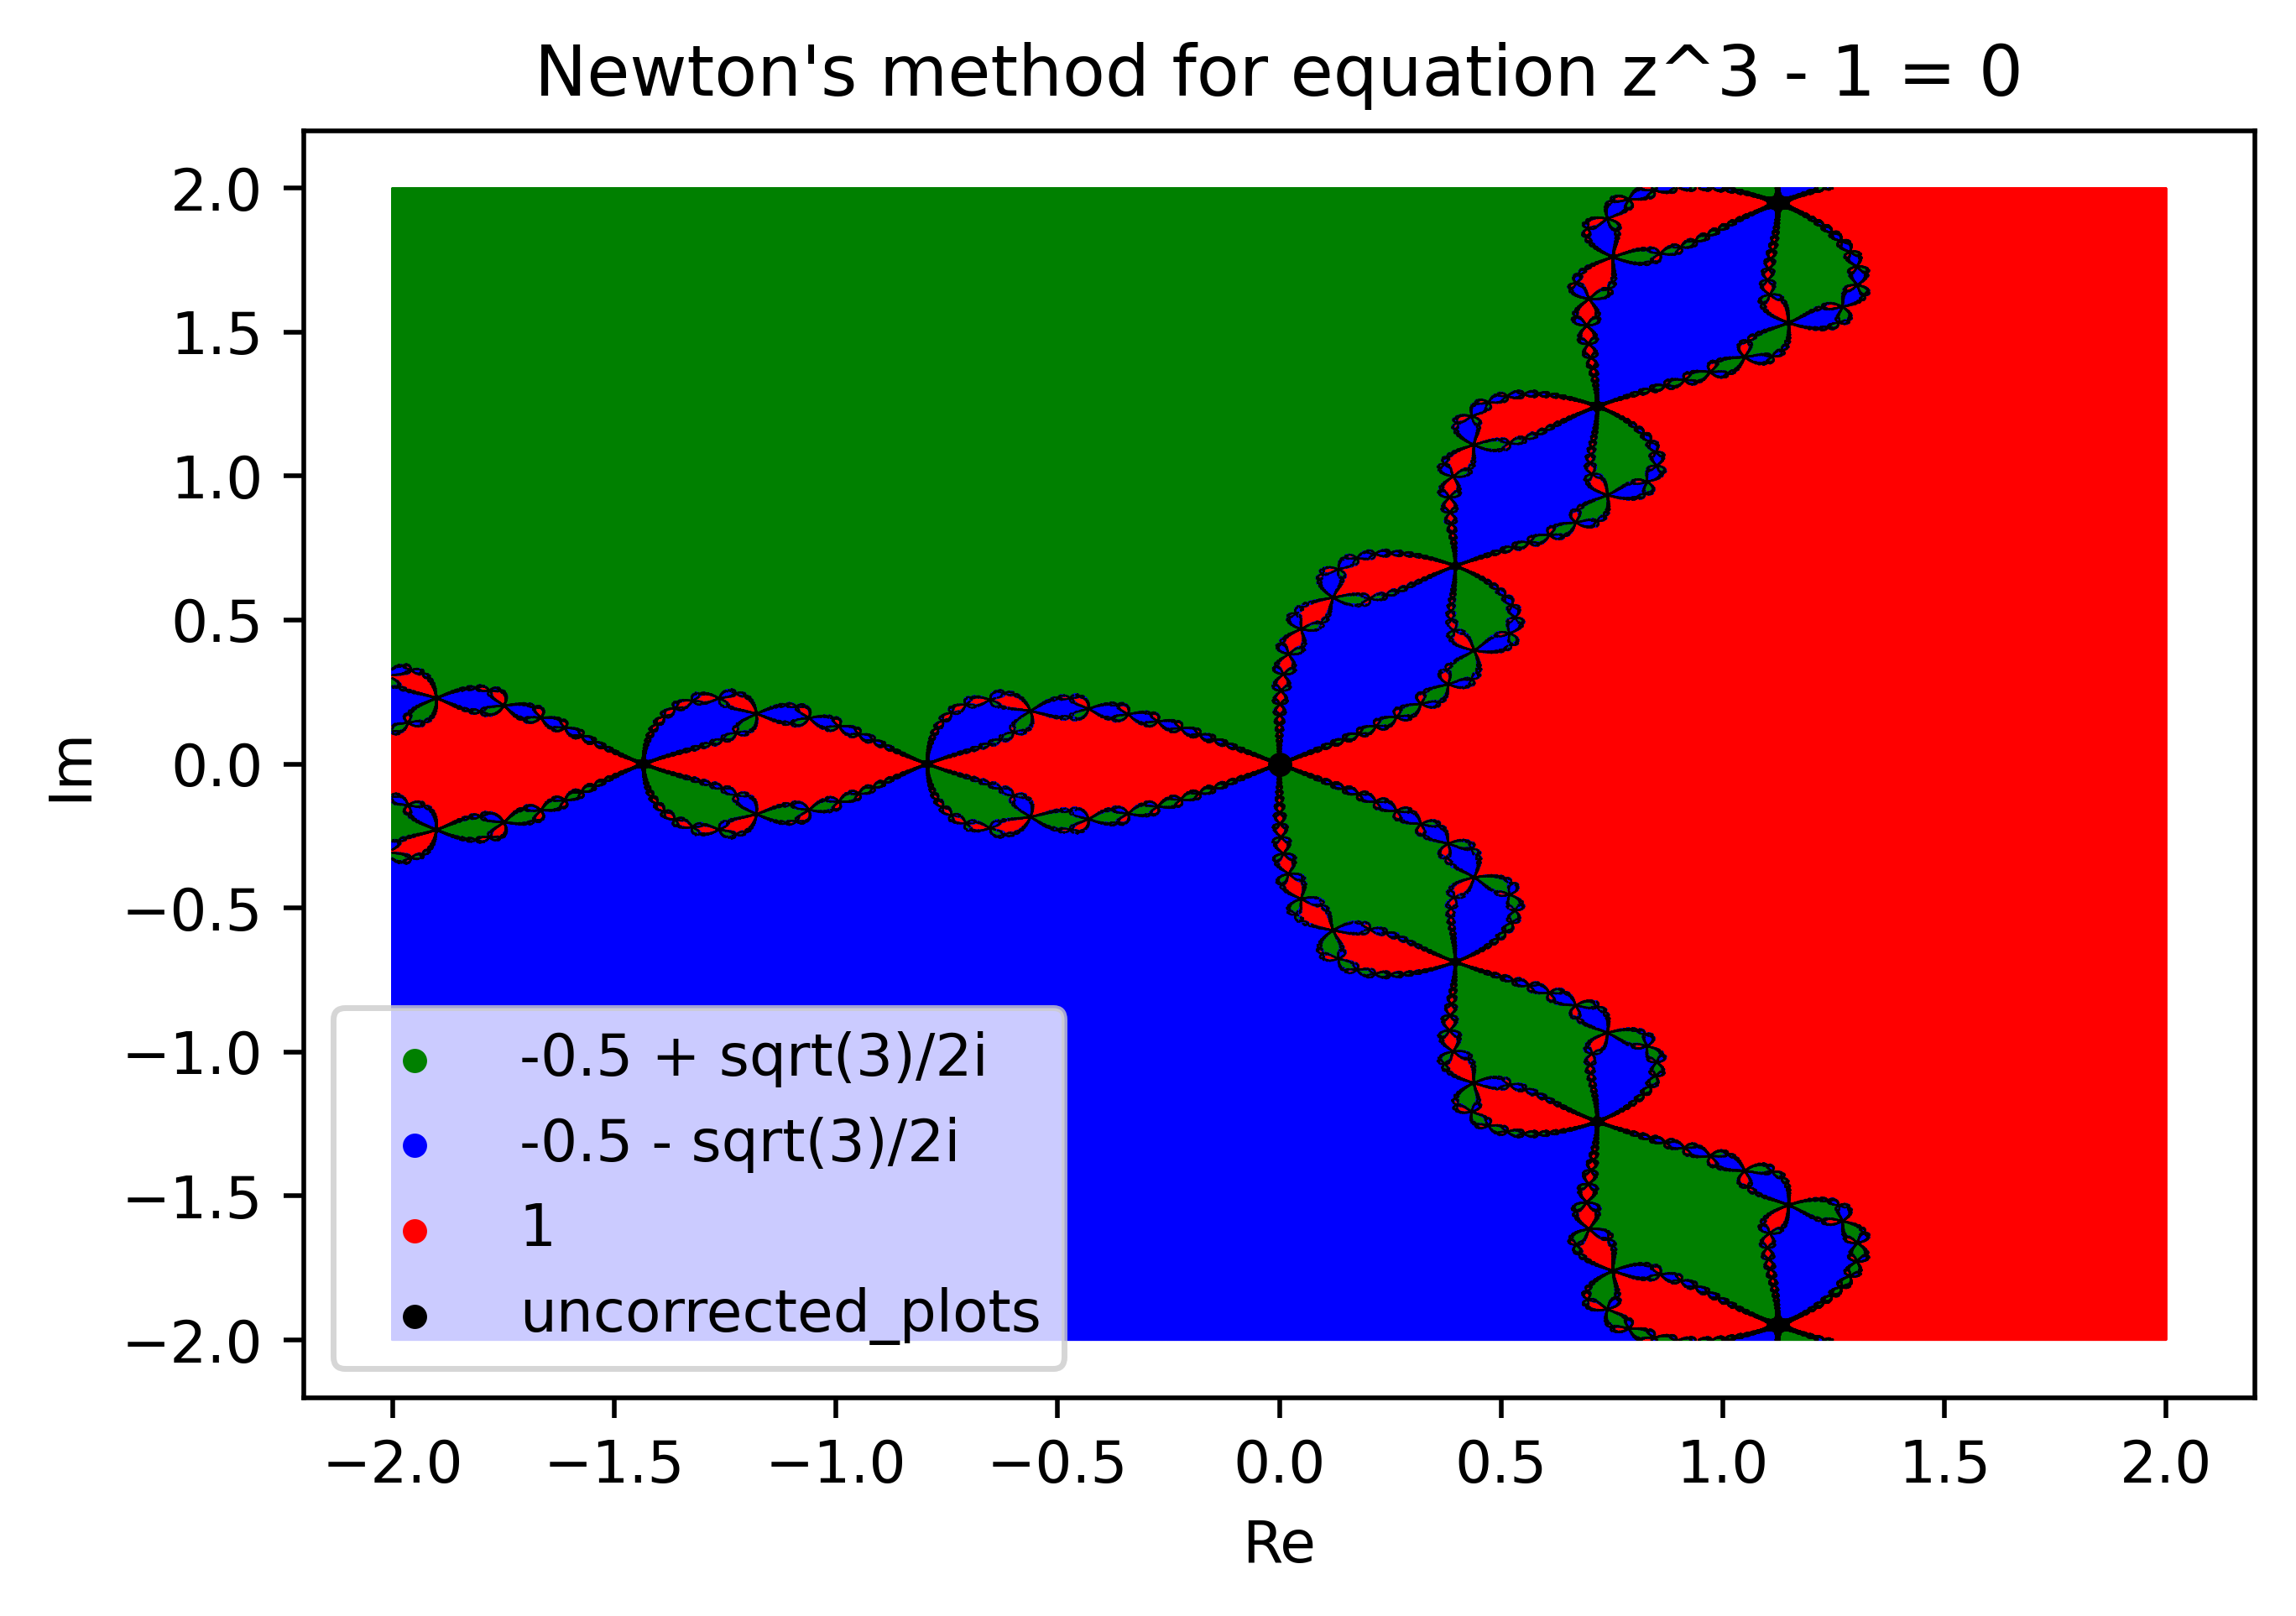

In [3]:
def draw_scatter(first_root_pool, second_root_pool,third_root_pool, uncorrected_root_pool):
    data = (np.transpose(first_root_pool), np.transpose(second_root_pool), np.transpose(third_root_pool), np.transpose(uncorrected_root_pool))            
    colors = ("red", "green", "blue", "black")
    groups = ("1", "-0.5 + sqrt(3)/2i", "-0.5 - sqrt(3)/2i", "uncorrected_plots")
    
    # Create plot
    fig = plt.figure(dpi=500)
    ax = fig.add_subplot()
    
    for point, color, group in zip(data, colors, groups):
        if point.size >= 2:
            x, y = point
            ax.scatter(x, y, alpha=1, c=color, edgecolors='none', s=0.1)
    ax.scatter(x=-0.5, y=sqrt(3)/2, c=colors[1], s=10, label=groups[1])
    ax.scatter(x=-0.5, y=-(sqrt(3)/2), c=colors[2], s=10, label=groups[2])
    ax.scatter(x=1, y=0, c=colors[0], s=10, label=groups[0])
    ax.scatter(x=0, y=0, c=colors[3], s=10, label=groups[3])
    plt.title('Newton\'s method for equation z^3 - 1 = 0')
    plt.legend(loc=3)
    plt.xlabel("Re")
    plt.ylabel("Im")
    plt.show()
    
draw_scatter(first_root_pool, second_root_pool, third_root_pool, uncorrected_root_pool)

Можно заметить, что бассейны корней в большинстве точек ведут себя как и предполагалось, но для некоторых точек меняются - вырисовывается фрактальная структура бассейнов. Можно предположить, что если расстояние от начальной точки до 2 корней меньше 1, то точка попадет в бассейн 3 корня, проверим это. Для этого нарисуем такой график: для тех точек, для которыйх расстояние до 2 корней меньше 1 покрасим их в цвет 3 корня и сравним полученные графики.

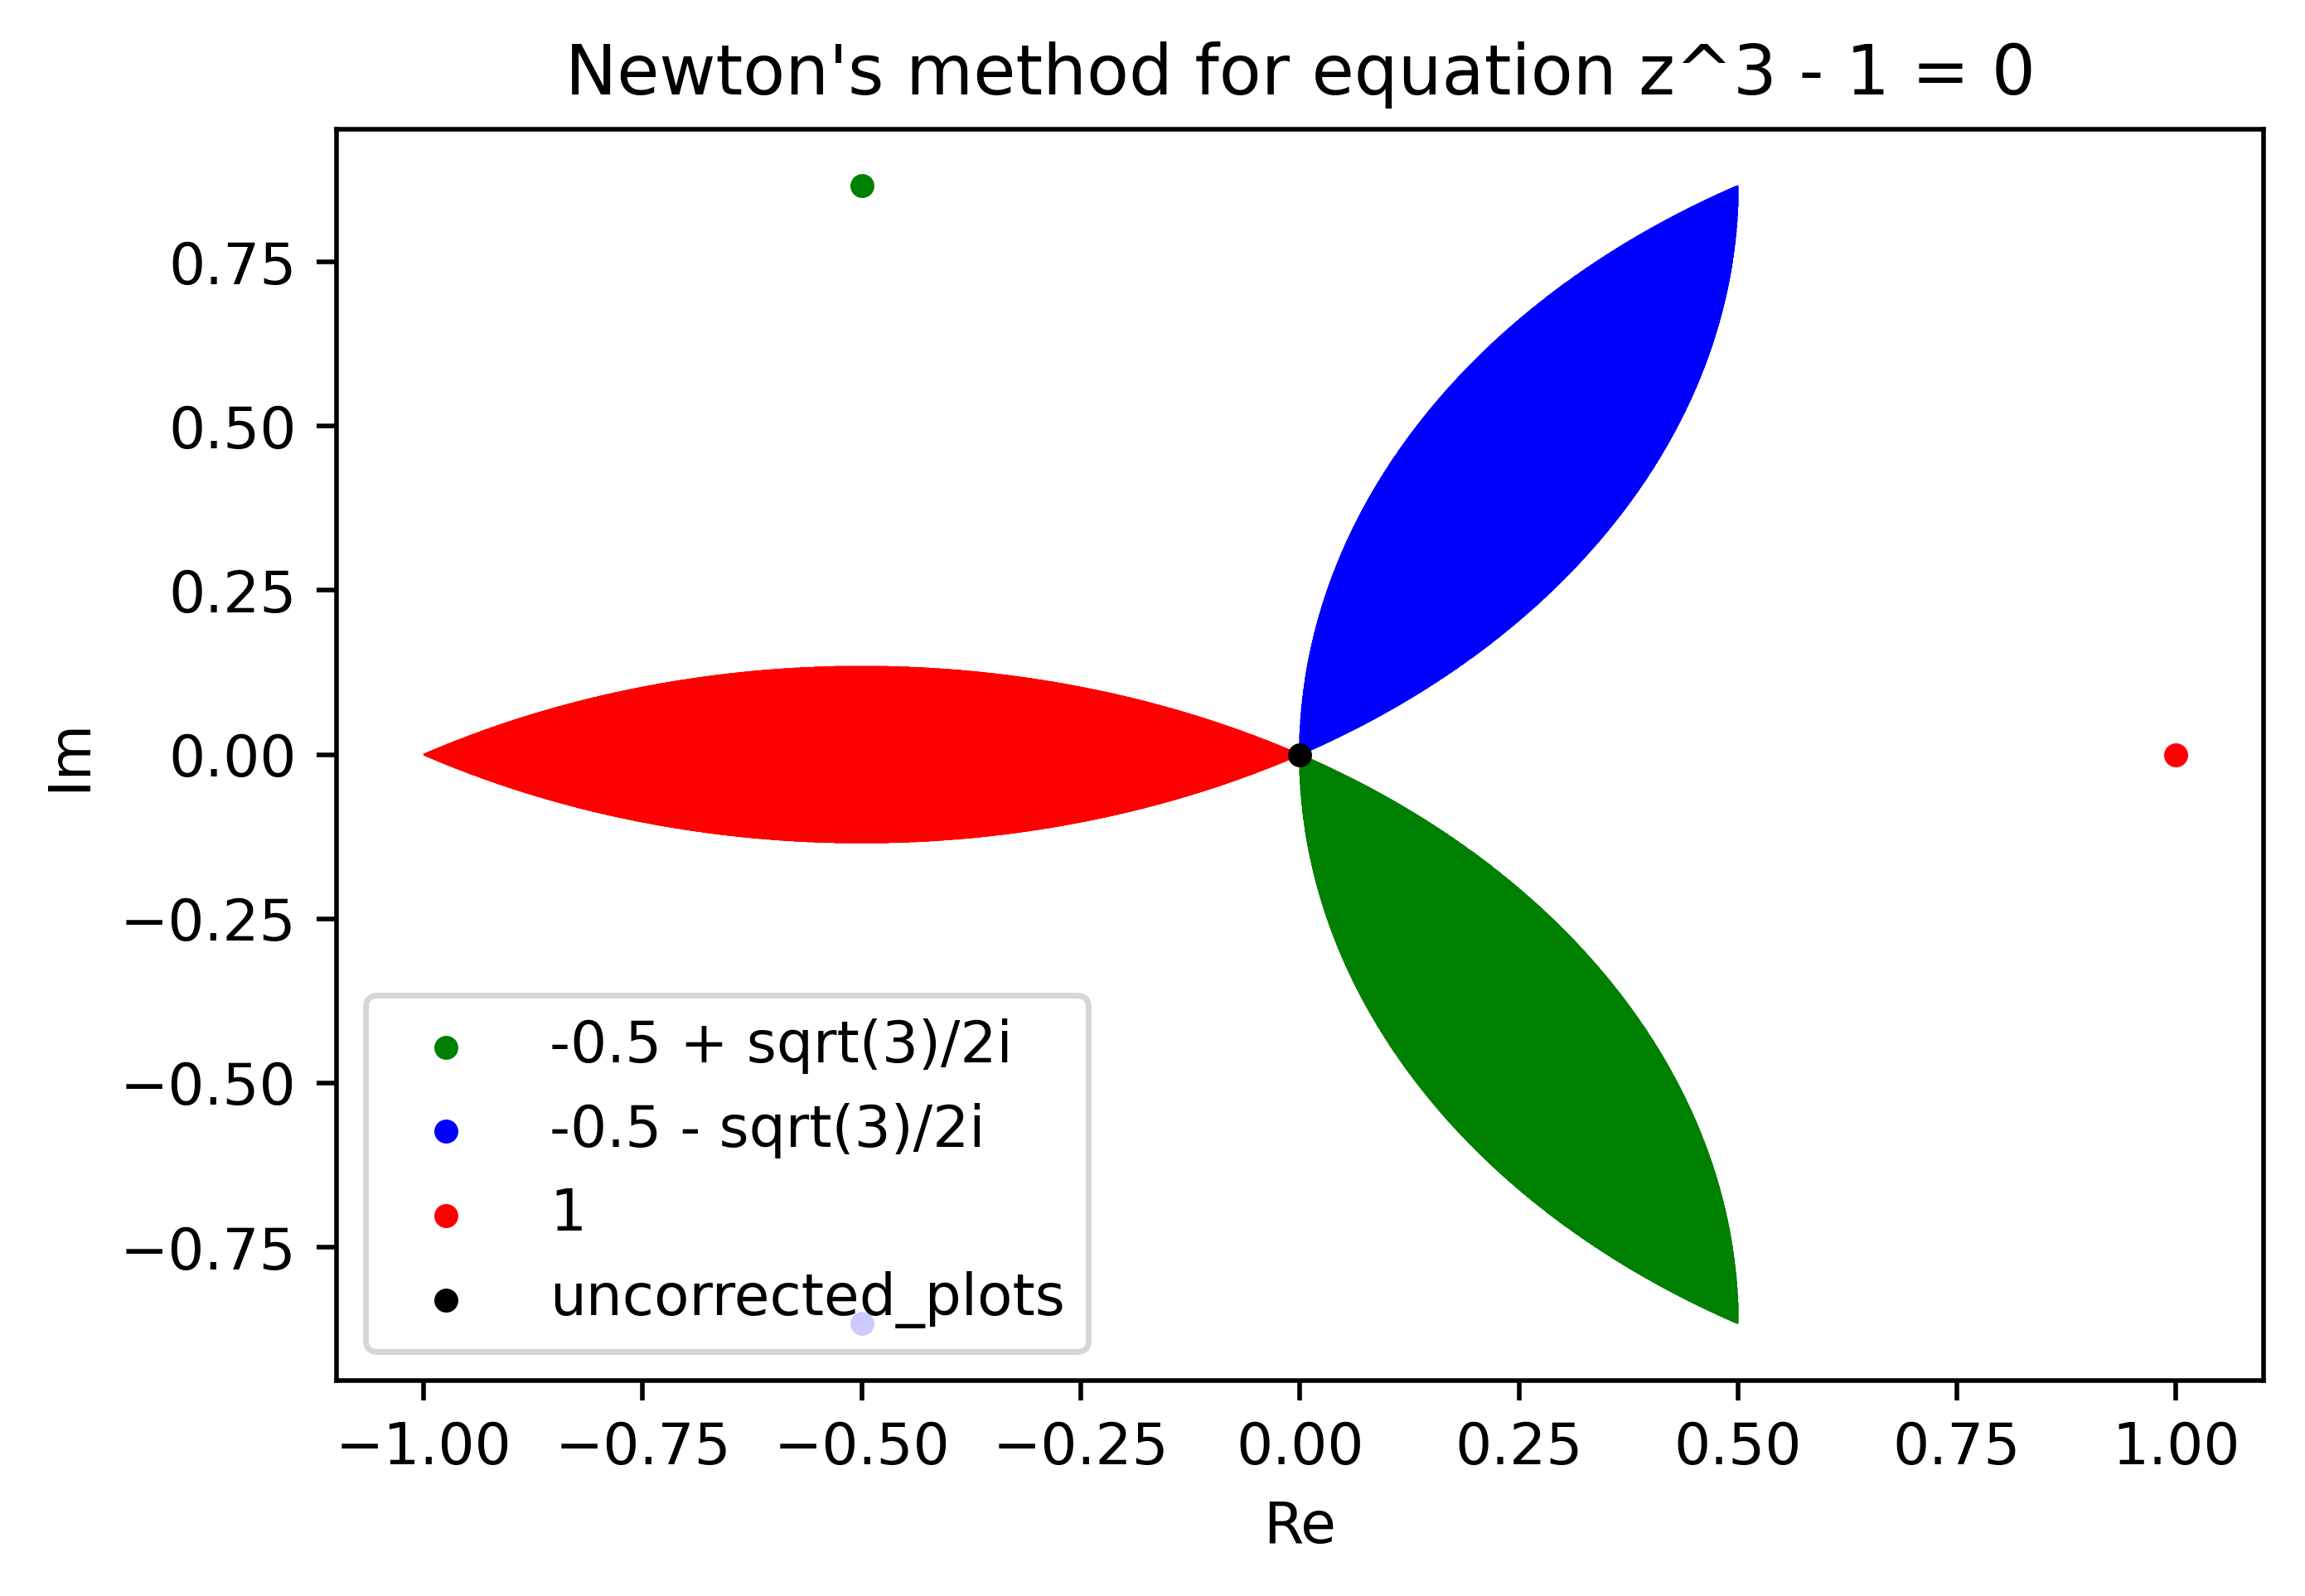

In [4]:
def calc_distances_pools():
    pools = [[] for _ in range(4)]     
    line = np.arange(-2, 2, step = PLOT_STEP)
    for real in line:
        for image in line:
            num = complex(real, image)
            distances_to_roots = [abs(num - firs_root), abs(num - second_root), abs(num - third_root)]
            for k in range(3):
                if distances_to_roots[(k + 1) % 3] < 1 and distances_to_roots[(k + 2) % 3] < 1:
                    pools[k].append((real, image))
                                
    pools[3].append((0,0))            
    return np.array(pools[0], dtype=tuple),\
            np.array(pools[1], dtype=tuple),\
            np.array(pools[2], dtype=tuple),\
            np.array(pools[3], dtype=tuple),
f, s, t, u = calc_distances_pools()
draw_scatter(f, s, t, u)        


Это предположение тоже окозалось неверным

## Часть 2
Нарисуем графики сходимости к корням для некоторых точек


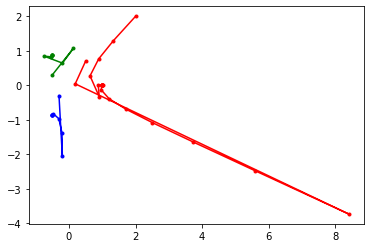

In [5]:
points = [0.5+0.7j, -0.5 + 0.3j, -0.3-0.3j, 2 + 2j]
colors = ['red', 'green', 'blue']
for point in points:
    root, path = newton_method(point, True)
    distances_to_roots = [abs(root - firs_root), abs(root - second_root), abs(root - third_root)]
    ind_root = np.argmin(distances_to_roots)
    x = list(map(lambda x: x.real, path))
    y = list(map(lambda x: x.imag,path))
    plt.plot( x, y, color=colors[ind_root], marker='.')
plt.show()
